In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np

In [3]:
xmin = -2.2
ymin = -1.6

xmax= 1.6
ymax = 1.6

xstep = 1920
ystep = 1200

dx = (xmax - xmin) / xstep
dy = (ymax - ymin) / ystep

max_iteration = 200

In [4]:
# escape = [[0 for i in range(xstep)] for j in range(ystep)]

In [13]:
def mandelbrot_simple(xmin, ymin, xstep, ystep, dx, dy):
    escape = np.zeros((ystep, xstep), dtype=np.int16)
    for j in range(ystep):
        for i in range(xstep):
            c = complex((xmin + i * dx),  (ymin + j * dy))
            z = c
            for k in range(1, max_iteration):
                if abs(z) > 2:
                    escape[j, i] = k
                    break
                z = z * z + c
    return escape

In [14]:
%timeit mandelbrot_simple(xmin, ymin, xstep, ystep, dx, dy)

1 loop, best of 3: 17.1 s per loop


In [15]:
from numba import jit
mandelbrot_simple_numba = jit(mandelbrot_simple)

In [16]:
%timeit -n 1 mandelbrot_simple_numba(xmin, ymin, xstep, ystep, dx, dy)

1 loop, best of 3: 377 ms per loop


In [17]:
 %timeit mandelbrot_simple_numba(xmin, ymin, xstep, ystep, dx, dy)

1 loop, best of 3: 373 ms per loop


In [18]:
 escape = mandelbrot_simple_numba(xmin, ymin, xstep, ystep, dx, dy)

In [19]:
plt.imsave(fname='mandelbrot.png', arr=escape)

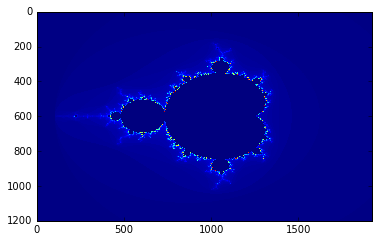

In [20]:
_ = plt.imshow(escape, interpolation='nearest')

In [ ]:
escape = np.zeros((ystep, xstep)).flatten()

In [ ]:
cc = np.ones((ystep, xstep), dtype=complex)
for j in range(ystep):
    for i in range(xstep):
        cc[j][i] = complex((xmin + i * dx), (ymin + j * dy))

In [ ]:
for i, c in enumerate(cc.flatten()):
    z = c
    for k in range(1, max_iteration):
        if abs(z) > 2:
            escape[i] = k
            break
        z = z * z + c
escape = escape.reshape((ystep, xstep))

In [ ]:
_ = plt.imshow(escape, interpolation='nearest')

In [ ]:
X, Y = np.mgrid[ymin:ymax:dy, xmin:xmax:dx]
cc = Y + X * 1j

In [ ]:
z = np.zeros_like(cc, dtype=np.complex)
escape = np.zeros_like(cc, dtype=np.int16)
mask = np.ones_like(cc, dtype=np.int8)

for k in range(max_iteration):
    z = z * z + cc
    mask = np.abs(z)> 2
    escape[mask] = k
    z[mask] = complex(0, 0)
    cc[mask] = complex(0, 0)
    

In [ ]:
_ = plt.imshow(escape, interpolation='nearest')